# 股票数据分析

```{admonition} 在线刷题
:class: seealso

检查 or 强化 `Pandas` 数据分析操作？<a href="https://www.heywhale.com/mw/project/6146c0318447b8001769ff20" target="_blank">👉在线体验「Pandas进阶修炼300题」</a>
```

```{note} 
本页面代码可以[在线编辑、执行](../指引/在线执行.md)！
```

## 本页面数据说明


为了更好的介绍相关操作，本页面使用 **某股票数据** 数据进行展开，你应该对数据字段、数值、类型等相关信息做一个大致了解！

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df1 = pd.read_csv("000001_daily.csv")
df2 = pd.read_csv("000001_5min.csv")
df1.head()

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2017/1/3,8.27,8.32,8.34,8.25,459840,420595184,1.09,0.73,0.06,0.31
1,2017/1/4,8.31,8.32,8.34,8.30,449330,411503440,0.48,0.00,0.00,0.31
2,2017/1/5,8.33,8.33,8.34,8.31,344373,315769696,0.36,0.12,0.01,0.24
3,2017/1/6,8.33,8.29,8.33,8.27,358154,327176432,0.72,-0.48,-0.04,0.24
4,2017/1/9,8.29,8.31,8.33,8.27,361082,329994608,0.72,0.24,0.02,0.21


## 时间类型转换

将 df1 和 df2 的 日期 列转换为 pandas 支持的时间格式

In [2]:
df1['日期'] = pd.to_datetime(df1['日期'])
df2['时间'] = pd.to_datetime(df2['时间'])
# df1['日期'] = df1['日期'].astype('datetime64[ns]')

## 日期筛选

### 按区间筛选

筛选出 df2 时间在 `2021-08-03 09:35:00` 与 `2021-08-04 15:00:00` 之间的数据

In [3]:
df2[(df2['时间'] > '2021-08-03 09:35:00') & (df2['时间'] < '2021-08-04 15:00:00')]

,时间,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
1,2021-08-03 09:40:00,17.77,17.76,17.83,17.66,-0.11,-0.02,41508,73683531,0.96,0.02
2,2021-08-03 09:45:00,17.77,17.77,17.83,17.73,0.06,0.01,18521,32915794,0.56,0.01
3,2021-08-03 09:50:00,17.77,17.72,17.78,17.70,-0.28,-0.05,24424,43323693,0.45,0.01
4,2021-08-03 09:55:00,17.71,17.77,17.78,17.70,0.28,0.05,23197,41110937,0.45,0.01
5,2021-08-03 10:00:00,17.78,17.81,17.83,17.74,0.23,0.04,18111,32208076,0.51,0.01
...,...,...,...,...,...,...,...,...,...,...,...
90,2021-08-04 14:35:00,17.81,17.81,17.83,17.78,0.00,0.00,12903,22973276,0.28,0.01
91,2021-08-04 14:40:00,17.82,17.80,17.85,17.79,-0.06,-0.01,12254,21835743,0.34,0.01
92,2021-08-04 14:45:00,17.82,17.82,17.84,17.80,0.11,0.02,9893,17631076,0.22,0.01
93,2021-08-04 14:50:00,17.81,17.80,17.83,17.80,-0.11,-0.02,12127,21603534,0.17,0.01


### 按指定时间筛选

筛选 df2 时间为 2021-08-03 的全部数据

In [4]:
df2.set_index('时间').truncate(after=pd.Timestamp('2021-08-04'))

,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
时间,,,,,,,,,,
2021-08-03 09:35:00,17.99,17.78,18.02,17.75,-1.28,-0.23,52807,94339287,1.50,0.03
2021-08-03 09:40:00,17.77,17.76,17.83,17.66,-0.11,-0.02,41508,73683531,0.96,0.02
2021-08-03 09:45:00,17.77,17.77,17.83,17.73,0.06,0.01,18521,32915794,0.56,0.01
2021-08-03 09:50:00,17.77,17.72,17.78,17.70,-0.28,-0.05,24424,43323693,0.45,0.01
2021-08-03 09:55:00,17.71,17.77,17.78,17.70,0.28,0.05,23197,41110937,0.45,0.01
2021-08-03 10:00:00,17.78,17.81,17.83,17.74,0.23,0.04,18111,32208076,0.51,0.01
2021-08-03 10:05:00,17.83,17.84,17.91,17.79,0.17,0.03,28273,50498772,0.67,0.01
2021-08-03 10:10:00,17.84,18.01,18.01,17.83,0.95,0.17,37675,67585497,1.01,0.02
2021-08-03 10:15:00,18.01,18.05,18.09,18.01,0.22,0.04,31315,56528108,0.44,0.02


## 金融计算

### 涨跌额

`df1` 新增一列 涨跌，计算前后两日收盘价之差

注意：虽然我们的df1包含涨跌额列，但是这个操作很常用，所以练习一下

In [5]:
df1['涨跌']  = df1.收盘.diff()

### 涨跌幅

`df1` 新增一列 涨跌变化率，计算前后两日收盘价之差的变化率

注意：虽然我们的df1包含涨跌幅列，但是这个操作很常用，所以练习一下，结果可以用于验证

In [6]:
df1['涨跌变化率'] = (df1.收盘.pct_change()).apply(lambda x: format(x, '.2%'))

### 移动均值

计算收盘价的5日移动均线

In [7]:
df1.收盘.rolling(window=5).mean()

0          NaN
1          NaN
2          NaN
3          NaN
4        8.314
         ...  
1141    18.672
1142    18.792
1143    19.298
1144    19.650
1145    19.676
Name: 收盘, Length: 1146, dtype: float64

### 移动均值（可视化）

计算并绘制收盘价的5日移动均线

<AxesSubplot:>

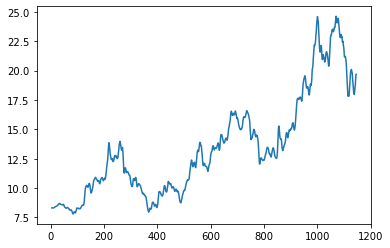

In [8]:
df1.收盘.rolling(window=5).mean().plot()

### 移动均值（可视化）

同时计算并绘制 df1 的收盘价、5日均线、20日均线

<AxesSubplot:xlabel='日期'>

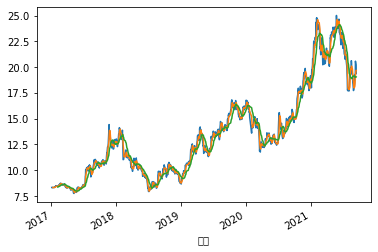

In [9]:
df1.set_index("日期")['收盘'].plot()
df1.set_index("日期")['收盘'].rolling(5).mean().plot()
df1.set_index("日期")['收盘'].rolling(20).mean().plot()

### 指数移动平均值（EMA）

根据 df1 计算 EMA20

In [10]:
df1['EMA20'] = df1['收盘'].ewm(span=20,min_periods=0,adjust=False,ignore_na=False).mean()

### MACD

计算 df1 的 MACD 指标

In [11]:
exp1 = df1['收盘'].ewm(span=12, adjust=False).mean()
exp2 = df1['收盘'].ewm(span=26, adjust=False).mean()
df1['MACD'] = exp1 - exp2
df1['Signal line'] = df1['MACD'].ewm(span=9, adjust=False).mean()

### 布林指标

计算并绘制布林指标，计算方法参考[百度百科](https://baike.baidu.com/item/%E5%B8%83%E6%9E%97%E7%BA%BF%E6%8C%87%E6%A0%87/3325894?fromtitle=%E5%B8%83%E6%9E%97%E6%8C%87%E6%A0%87&fromid=258891&fr=aladdin)


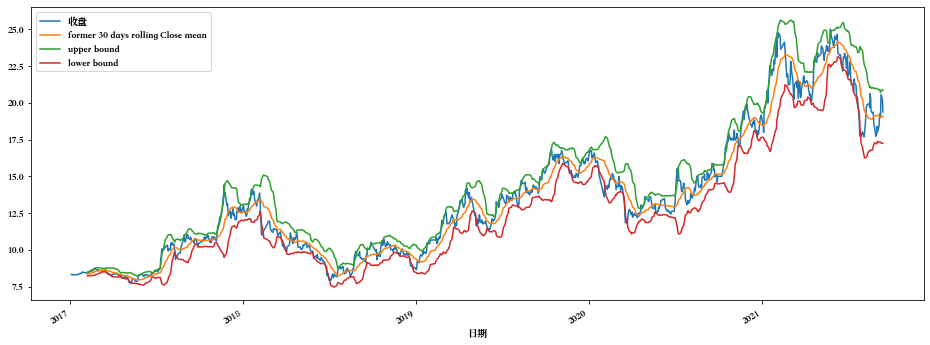

In [12]:
df1['former 30 days rolling Close mean'] = df1['收盘'].rolling(20).mean()
df1['upper bound'] = df1['former 30 days rolling Close mean'] + \
    2*df1['收盘'].rolling(20).std()  # 在这里我们取20天内的标准差
df1['lower bound'] = df1['former 30 days rolling Close mean'] - \
    2*df1['收盘'].rolling(20).std()

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Songti SC'] #设置中文，如果本句代码导致失效，可以点击https://mp.weixin.qq.com/s/WKOGvQP-6QUAP00ZXjhweg

df1.set_index("日期")[['收盘', 'former 30 days rolling Close mean','upper bound','lower bound' ]].plot(figsize=(16, 6))

plt.show()

## 日期移动

### 移动值

将 df1 的索引设置为日期，将 df1 数据向后移动一天

In [13]:
df1.set_index('日期').shift(1)

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,涨跌,涨跌变化率,EMA20,MACD,Signal line,former 30 days rolling Close mean,upper bound,lower bound
日期,,,,,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,8.27,8.32,8.34,8.25,459840.0,4.205952e+08,1.09,0.73,0.06,0.31,NaN,nan%,8.320000,0.000000,0.000000,NaN,NaN,NaN
2017-01-05,8.31,8.32,8.34,8.30,449330.0,4.115034e+08,0.48,0.00,0.00,0.31,0.00,0.00%,8.320000,0.000000,0.000000,NaN,NaN,NaN
2017-01-06,8.33,8.33,8.34,8.31,344373.0,3.157697e+08,0.36,0.12,0.01,0.24,0.01,0.12%,8.320952,0.000798,0.000160,NaN,NaN,NaN
2017-01-09,8.33,8.29,8.33,8.27,358154.0,3.271764e+08,0.72,-0.48,-0.04,0.24,-0.04,-0.48%,8.318005,-0.001777,-0.000228,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-08,18.60,19.24,19.56,18.35,1622344.0,3.067366e+09,6.56,4.28,0.79,0.84,0.79,4.28%,18.816960,-0.369698,-0.414708,19.0895,20.861284,17.317716
2021-09-09,19.24,19.23,19.55,19.10,1026201.0,1.979771e+09,2.34,-0.05,-0.01,0.53,-0.01,-0.05%,18.856297,-0.293684,-0.390503,19.0605,20.801346,17.319654
2021-09-10,19.11,19.00,19.15,18.80,739506.0,1.399536e+09,1.82,-1.20,-0.23,0.38,-0.23,-1.20%,18.869983,-0.249129,-0.362229,19.0160,20.712503,17.319497


### 移动索引

将 df1 的索引设置为日期，并将全部日期向后移动一天

In [14]:
import datetime
df1.set_index('日期').shift(freq=datetime.timedelta(1))

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,涨跌,涨跌变化率,EMA20,MACD,Signal line,former 30 days rolling Close mean,upper bound,lower bound
日期,,,,,,,,,,,,,,,,,,
2017-01-04,8.27,8.32,8.34,8.25,459840,420595184,1.09,0.73,0.06,0.31,NaN,nan%,8.320000,0.000000,0.000000,NaN,NaN,NaN
2017-01-05,8.31,8.32,8.34,8.30,449330,411503440,0.48,0.00,0.00,0.31,0.00,0.00%,8.320000,0.000000,0.000000,NaN,NaN,NaN
2017-01-06,8.33,8.33,8.34,8.31,344373,315769696,0.36,0.12,0.01,0.24,0.01,0.12%,8.320952,0.000798,0.000160,NaN,NaN,NaN
2017-01-07,8.33,8.29,8.33,8.27,358154,327176432,0.72,-0.48,-0.04,0.24,-0.04,-0.48%,8.318005,-0.001777,-0.000228,NaN,NaN,NaN
2017-01-10,8.29,8.31,8.33,8.27,361082,329994608,0.72,0.24,0.02,0.21,0.02,0.24%,8.317242,-0.002179,-0.000618,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-09,19.24,19.23,19.55,19.10,1026201,1979771472,2.34,-0.05,-0.01,0.53,-0.01,-0.05%,18.856297,-0.293684,-0.390503,19.0605,20.801346,17.319654
2021-09-10,19.11,19.00,19.15,18.80,739506,1399536016,1.82,-1.20,-0.23,0.38,-0.23,-1.20%,18.869983,-0.249129,-0.362229,19.0160,20.712503,17.319497
2021-09-11,18.89,20.57,20.77,18.84,2314945,4668361728,10.16,8.26,1.57,1.19,1.57,8.26%,19.031889,-0.086141,-0.307011,19.0500,20.844670,17.255330


## 日期重采样

### 日 -> 周

按周对 df1 进行重采样，保留每周最后一个数据

In [15]:
df1.set_index('日期').resample('W').last()

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,涨跌,涨跌变化率,EMA20,MACD,Signal line,former 30 days rolling Close mean,upper bound,lower bound
日期,,,,,,,,,,,,,,,,,,
2017-01-08,8.33,8.29,8.33,8.27,358154.0,3.271764e+08,0.72,-0.48,-0.04,0.24,-0.04,-0.48%,8.318005,-0.001777,-0.000228,NaN,NaN,NaN
2017-01-15,8.30,8.32,8.35,8.28,434301.0,3.976019e+08,0.84,0.12,0.01,0.26,0.01,0.12%,8.315026,-0.002529,-0.002001,NaN,NaN,NaN
2017-01-22,8.33,8.38,8.39,8.33,393329.0,3.618652e+08,0.72,0.48,0.04,0.23,0.04,0.48%,8.323220,0.005576,-0.000237,NaN,NaN,NaN
2017-01-29,8.43,8.49,8.50,8.42,420713.0,3.918443e+08,0.95,0.83,0.07,0.25,0.07,0.83%,8.359773,0.029337,0.012089,NaN,NaN,NaN
2017-02-05,8.50,8.42,8.52,8.39,315472.0,2.926179e+08,1.53,-0.82,-0.07,0.19,-0.07,-0.82%,8.365509,0.030296,0.015730,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-22,19.97,19.42,20.07,18.70,1614628.0,3.119153e+09,6.74,-4.52,-0.92,0.83,-0.92,-4.52%,19.631205,-0.142627,-0.419982,18.8795,20.984246,16.774754
2021-08-29,18.56,18.39,18.88,18.31,728820.0,1.354409e+09,3.09,-0.38,-0.07,0.38,-0.07,-0.38%,19.335072,-0.307851,-0.292708,19.1150,20.952578,17.277422
2021-09-05,18.50,18.04,18.50,17.70,1394819.0,2.523273e+09,4.35,-1.96,-0.36,0.72,-0.36,-1.96%,18.806369,-0.493470,-0.416861,19.1445,20.911466,17.377534


### 日 -> 月

按月对 df1 进行重采样，保留每月最后一个数据

In [16]:
df1.set_index('日期').resample('M').last()

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,涨跌,涨跌变化率,EMA20,MACD,Signal line,former 30 days rolling Close mean,upper bound,lower bound
日期,,,,,,,,,,,,,,,,,,
2017-01-31,8.43,8.49,8.50,8.42,420713,391844288,0.95,0.83,0.07,0.25,0.07,0.83%,8.359773,0.029337,0.012089,NaN,NaN,NaN
2017-02-28,8.59,8.64,8.67,8.58,369720,350366896,1.05,0.58,0.05,0.22,0.05,0.58%,8.573112,0.074404,0.075472,8.5665,8.773460,8.359540
2017-03-31,8.24,8.33,8.34,8.24,633121,578579040,1.21,1.09,0.09,0.37,0.09,1.09%,8.413994,-0.073842,-0.049755,8.4575,8.748768,8.166232
2017-04-30,8.12,8.15,8.15,8.08,286446,256106698,0.86,0.25,0.02,0.17,0.02,0.25%,8.218865,-0.078102,-0.079294,8.2270,8.428896,8.025104
2017-05-31,8.26,8.36,8.39,8.22,1033211,948741888,2.06,1.21,0.10,0.61,0.10,1.21%,8.056467,0.011297,-0.052053,7.9735,8.314907,7.632093
2017-06-30,8.56,8.55,8.59,8.47,499633,468003520,1.40,-0.47,-0.04,0.30,-0.04,-0.47%,8.368898,0.107020,0.081328,8.3430,8.612198,8.073802
2017-07-31,10.12,9.99,10.14,9.77,1575864,1671814032,3.68,-0.70,-0.07,0.93,-0.07,-0.70%,9.708929,0.401497,0.434813,9.6690,11.022139,8.315861
2017-08-31,10.71,10.60,10.76,10.47,1151786,1297730592,2.70,-1.40,-0.15,0.68,-0.15,-1.40%,10.224083,0.250813,0.182339,10.1250,11.030480,9.219520
2017-09-30,10.24,10.43,10.48,10.18,682280,753852528,2.94,2.25,0.23,0.40,0.23,2.25%,10.512902,0.007831,0.083505,10.6590,11.128575,10.189425


### 分钟 -> 日

按日对 df2 进行重采样，保留每天最后一个数据

In [17]:
df2.set_index('时间').resample('D').last()

,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
时间,,,,,,,,,,
2021-08-03,17.92,17.89,17.94,17.89,-0.22,-0.04,20126.0,36034747.0,0.28,0.01
2021-08-04,17.81,17.81,17.82,17.80,0.00,0.00,12422.0,22122442.0,0.11,0.01
2021-08-05,17.64,17.68,17.68,17.64,0.17,0.03,15602.0,27568733.0,0.23,0.01
2021-08-06,17.84,17.86,17.87,17.84,0.06,0.01,13251.0,23647402.0,0.17,0.01
2021-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-09,19.07,19.06,19.09,19.06,-0.16,-0.03,16831.0,32092450.0,0.16,0.01
2021-08-10,19.72,19.73,19.74,19.70,0.05,0.01,14968.0,29523092.0,0.20,0.01
2021-08-11,19.74,19.81,19.81,19.74,0.35,0.07,17181.0,34015140.0,0.35,0.01


### 低频 -> 高频

将 df2 的 5分钟 数据改为 3分钟，缺失数据向前填充

In [18]:
df_3min = df2.set_index('时间').resample('3min').last()
df_3min.ffill()

,开盘,收盘,最高,最低,涨跌幅,涨跌额,成交量,成交额,振幅,换手率
时间,,,,,,,,,,
2021-08-03 09:33:00,17.99,17.78,18.02,17.75,-1.28,-0.23,52807.0,94339287.0,1.50,0.03
2021-08-03 09:36:00,17.99,17.78,18.02,17.75,-1.28,-0.23,52807.0,94339287.0,1.50,0.03
2021-08-03 09:39:00,17.77,17.76,17.83,17.66,-0.11,-0.02,41508.0,73683531.0,0.96,0.02
2021-08-03 09:42:00,17.77,17.76,17.83,17.66,-0.11,-0.02,41508.0,73683531.0,0.96,0.02
2021-08-03 09:45:00,17.77,17.77,17.83,17.73,0.06,0.01,18521.0,32915794.0,0.56,0.01
...,...,...,...,...,...,...,...,...,...,...
2021-09-13 14:48:00,20.22,20.21,20.26,20.18,0.00,0.00,24419.0,49373556.0,0.40,0.01
2021-09-13 14:51:00,20.22,20.21,20.26,20.18,0.00,0.00,24419.0,49373556.0,0.40,0.01
2021-09-13 14:54:00,20.21,20.20,20.23,20.19,-0.05,-0.01,20769.0,41974013.0,0.20,0.01
